# Basic experiment over walk, run and bike ride

In [1]:
import sys
import warnings
import math as m
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import acf

import scipy
from scipy.signal import find_peaks
from scipy.spatial import distance_matrix

sys.path.insert(0, "./../")
from qppe.visuals import (
    plot_short_timeseries,
    plot_phase_trajectory,
    plot_phase_trajectory_and_phase
)
from qppe.qppe import (
    delay_embedding_matrix,
    QPPE
)

In [2]:
warnings.simplefilter('ignore')

In [3]:
def prepare_time_series(path, centred = True):
    data = pd.read_csv(path, delimiter =';', decimal=',')
    
    frequency = len(data)/(data['time'].values[-1]-data['time'].values[0])
    time_series = ((data['X_value'].values)**2 + (data['Y_value'].values)**2 + (data['Z_value'].values)**2)**.5
    
    if centred:
        time_series = (time_series - np.mean(time_series))
        
    time_points = (data['time'].values).astype(float).reshape([-1,])
    time_points = np.linspace(0,time_points[-1]-time_points[0],len(time_series))

    return time_series,time_points

In [4]:
path_basic_experiment = ['walk', 'stairs','bike']
data_limits = [(7000,20000), (2300,7500), (14260,22548)]

100%|██████████| 12501/12501 [00:45<00:00, 273.43it/s]


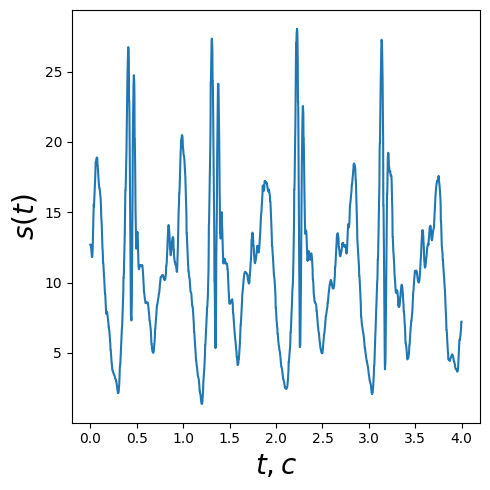

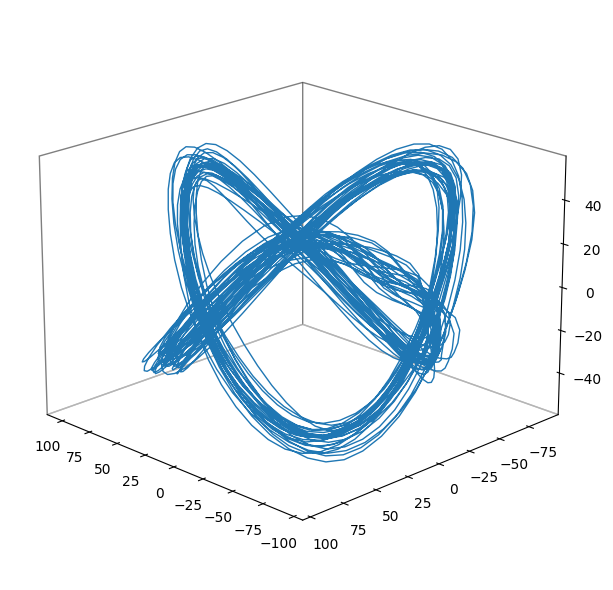

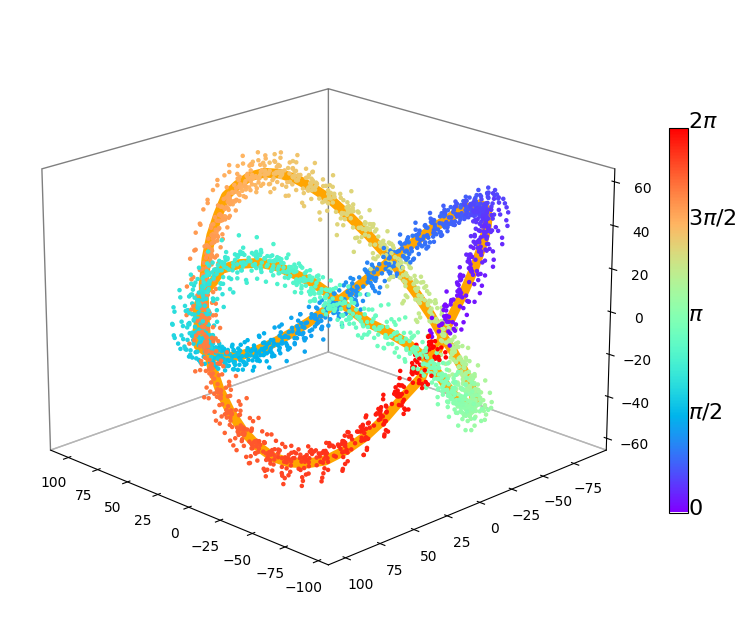

100%|██████████| 4701/4701 [00:22<00:00, 207.27it/s] 


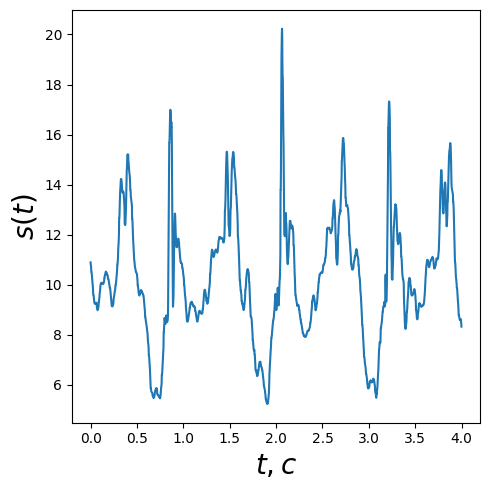

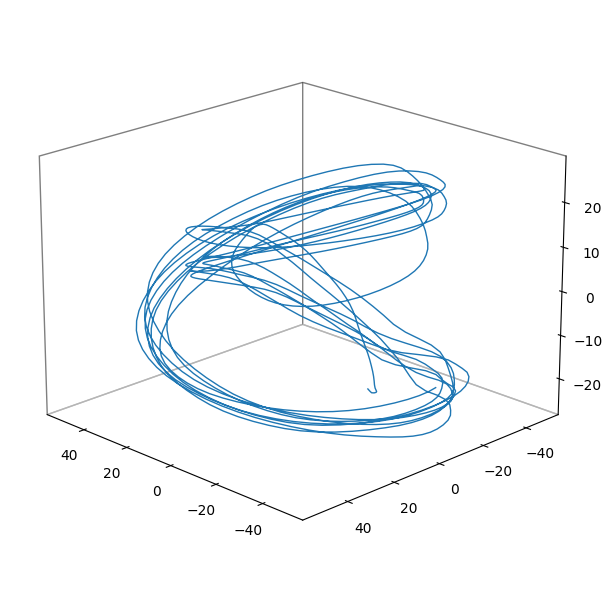

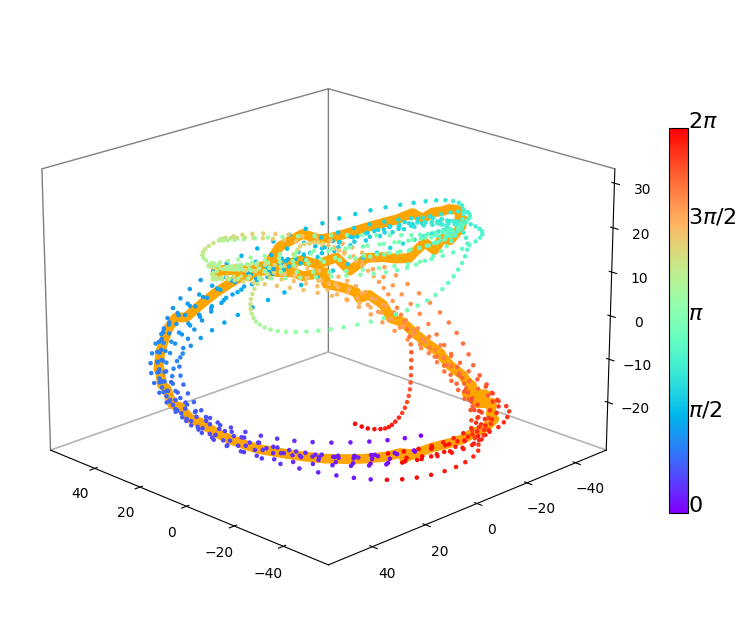

100%|██████████| 7789/7789 [00:31<00:00, 247.41it/s]


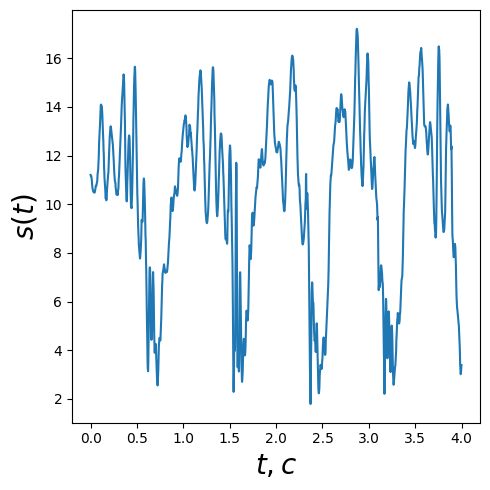

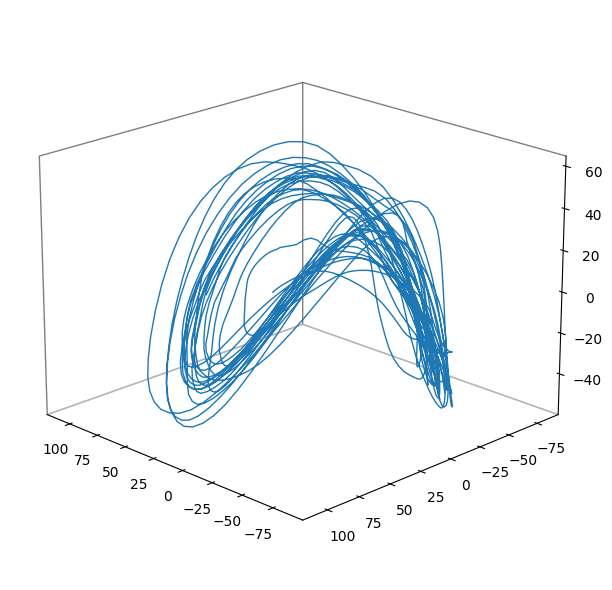

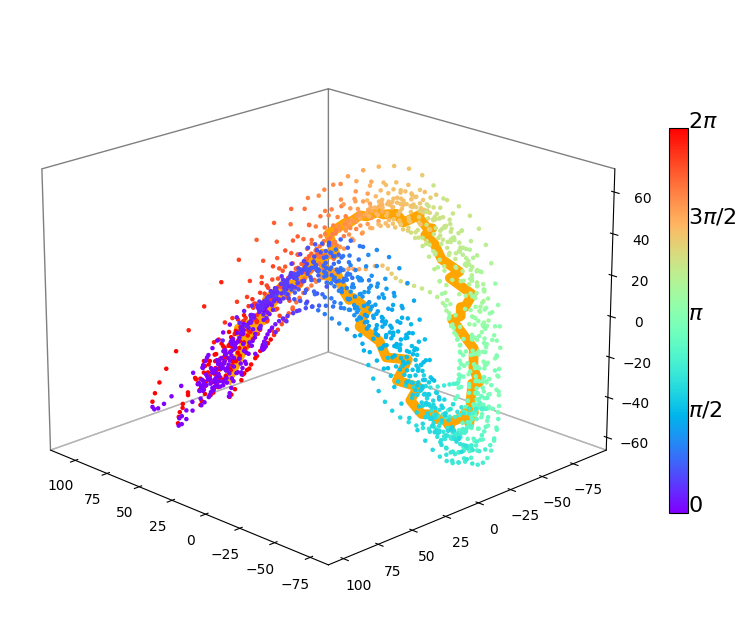

In [5]:
for i in range(3):
    x_acc, t = prepare_time_series(f'./../data/basic_experiment_{path_basic_experiment[i]}.csv', centred = False)
    x_acc = x_acc[data_limits[i][0]:data_limits[i][1]]
    
    X_h = delay_embedding_matrix(x_acc, 500)
    
    pca = PCA(n_components = 4)
    X_PCA = pca.fit_transform(X_h)
    
    phase_trajectory = X_PCA[::3,:3]
    
    result_dict = QPPE(x = x_acc, update_coef = 3, return_expectation_model = True)
    
    phase_trajectory = X_PCA[::5,:3]
    expextation_values = result_dict['expectation'][:700:5,:3]
    phase_history = result_dict['phase'][::5]
    
    plt.rcParams['figure.figsize'] = 5, 5
    plot_short_timeseries(x_acc[:2000], 500, path = f'./../images/2_1_sample_{path_basic_experiment[i]}.png')
    plt.show()
    
    plt.rcParams['figure.figsize'] = 6, 6
    plot_phase_trajectory(phase_trajectory, path = f'./../images/2_2_traj_{path_basic_experiment[i]}.png')
    plt.show()
    
    plt.rcParams['figure.figsize'] = 10, 10
    plot_phase_trajectory_and_phase(
        phase_trajectory,
        expextation_values,
        phase_history,
        rotation = (0, 30, 0),
        path = f'./../images/2_3_phase_{path_basic_experiment[i]}.png'
    )
    plt.show()